# Sampler Comparison
### August George, 2022

Samplers studied:

1. affine invariant ensemble sampler ()

In [1]:
import SBMLDiagrams
import tellurium as te

[]


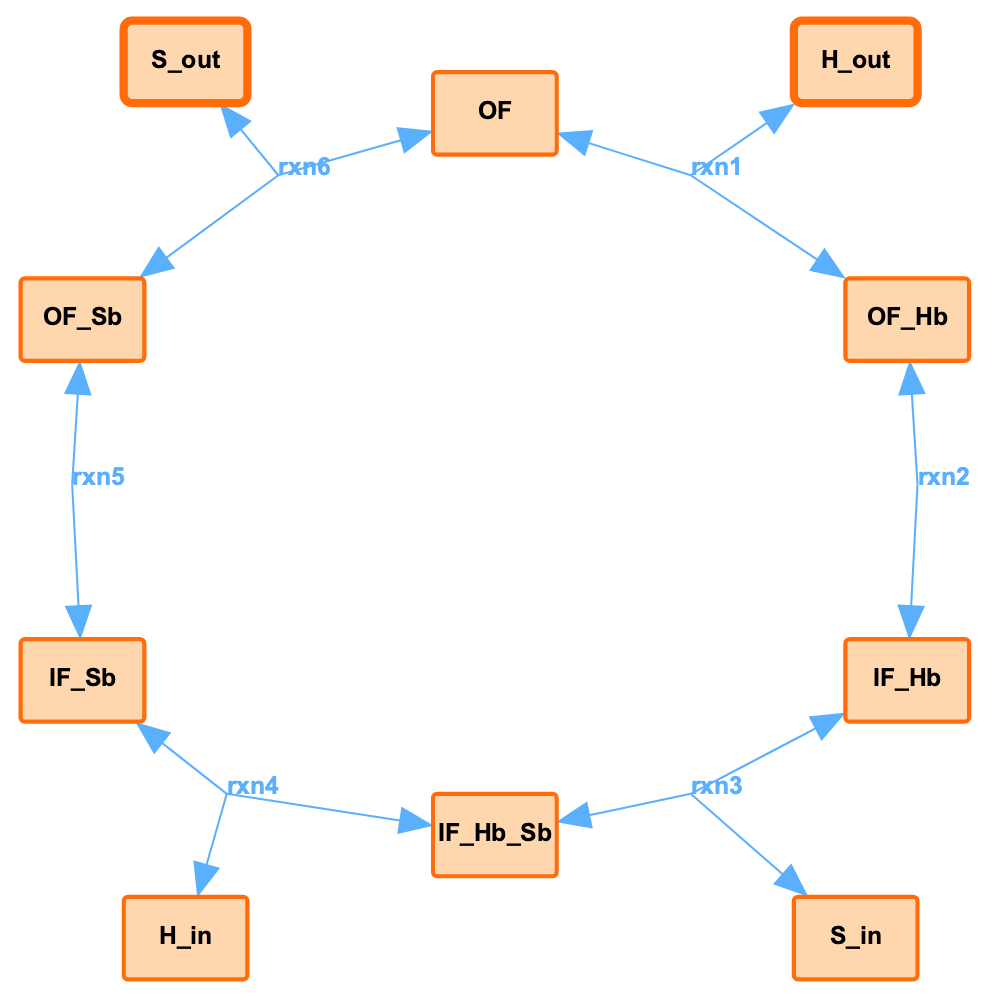

In [73]:
antimony_str = 'antiporter_12D_model.txt'
sbml_object = te.antimonyToSBML(antimony_str)
rr_model = te.loada(antimony_str)
#print(te.getODEsFromModel(rr_model))
rr_model.resetAll()

rr_model.integrator.absolute_tolerance = 1e-18
rr_model.integrator.relative_tolerance = 1e-15

df = SBMLDiagrams.load(sbml_object)
df.setNodeAndTextPosition("OF",[500,350],)
df.setNodeAndTextPosition("OF_Hb",[700,450],)
df.setNodeAndTextPosition("IF_Hb",[700, 625],)
df.setNodeAndTextPosition("IF_Hb_Sb",[500, 700],)
df.setNodeAndTextPosition("IF_Sb",[300, 625],)
df.setNodeAndTextPosition("OF_Sb",[300, 450],)

df.setNodeAndTextPosition("H_out",[675,325],)
df.setNodeAndTextPosition("S_out",[350,325],)
df.setNodeAndTextPosition("H_in",[350,750],)
df.setNodeAndTextPosition("S_in",[675,750],)




#df.autolayout(layout='circular')
# for node_name in df.getNodeIdList():
#     print(f'{node_name} : {df.getNodePosition(node_name)}')


    #df.getReactionBezierHandles(reaction_id)

df.setReactionCenterPosition("rxn1", [625,400])
df.setReactionCenterPosition("rxn2", [735,550])
df.setReactionCenterPosition("rxn3", [625,700])
df.setReactionCenterPosition("rxn4", [400,700])
df.setReactionCenterPosition("rxn5", [325,550])
df.setReactionCenterPosition("rxn6", [425,400])
for reaction_id in df.getReactionIdList():
    df.setReactionToStraightLine(reaction_id)
    df.setReactionLineThickness(reaction_id, line_thickness=1)


#df.setTextFontColor("rxn1", txt_font_color='black')
print(df.getTextIdList())
#df.autolayout(layout='circular')
df.draw(setImageSize=[1000,1000], showReversible=True, showReactionIds=True)
sbml_str = df.export()

In [74]:
SBMLDiagrams.animate(0, 10, 250, rr_model, 1e10, sbmlStr=sbml_str, frame_per_second=24, numDigit=10)

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


/Users/georgeau/Desktop/GitHub/sampler_survey/sampler_survey/animation


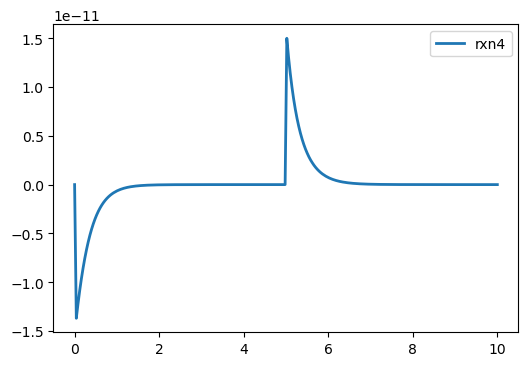

In [61]:
rr_model.resetAll()

rr_model.integrator.absolute_tolerance = 1e-18
rr_model.integrator.relative_tolerance = 1e-15
rr_model.simulate(0,10,250, selections=['time','rxn4'])
rr_model.plot()

In [ ]:
import networkx as nx

In [ ]:
vrxn1 = vol*(k1_f*OF*H_out-k1_r*OF_Hb)
vrxn2 = vol*(k2_f*OF_Hb-k2_r*IF_Hb)
vrxn3 = vol*(k3_f*IF_Hb*S_in-k3_r*IF_Hb_Sb)
vrxn4 = vol*(k4_f*IF_Hb_Sb-k4_r*IF_Sb*H_in)
vrxn5 = vol*(k5_f*IF_Sb-k5_r*OF_Sb)
vrxn6 = vol*(k6_f*OF_Sb-k6_r*OF*S_out)

dOF/dt = -vrxn1 + vrxn6
dOF_Hb/dt = vrxn1 - vrxn2
dIF_Hb/dt = vrxn2 - vrxn3
dIF_Hb_Sb/dt = vrxn3 - vrxn4
dIF_Sb/dt = vrxn4 - vrxn5
dOF_Sb/dt = vrxn5 - vrxn6
dH_in/dt = vrxn4
dS_in/dt = -vrxn3

In [ ]:
import numpy as np
import sunode
import sunode.wrappers.as_aesara
import pymc as pm

import multiprocessing as mp
#mp.set_start_method('fork')

times = np.arange(1900,1921,1)
lynx_data = np.array([
    4.0, 6.1, 9.8, 35.2, 59.4, 41.7, 19.0, 13.0, 8.3, 9.1, 7.4,
    8.0, 12.3, 19.5, 45.7, 51.1, 29.7, 15.8, 9.7, 10.1, 8.6
])
hare_data = np.array([
    30.0, 47.2, 70.2, 77.4, 36.3, 20.6, 18.1, 21.4, 22.0, 25.4,
    27.1, 40.3, 57.0, 76.6, 52.3, 19.5, 11.2, 7.6, 14.6, 16.2, 24.7
])

def lotka_volterra(t, y, p):
    """
    """

    vrxn1 = vol*(k1_f*OF*H_out-k1_r*OF_Hb)
    vrxn2 = vol*(k2_f*OF_Hb-k2_r*IF_Hb)
    vrxn3 = vol*(k3_f*IF_Hb*S_in-k3_r*IF_Hb_Sb)
    vrxn4 = vol*(k4_f*IF_Hb_Sb-k4_r*IF_Sb*H_in)
    vrxn5 = vol*(k5_f*IF_Sb-k5_r*OF_Sb)
    vrxn6 = vol*(k6_f*OF_Sb-k6_r*OF*S_out)

    dOF/dt = -vrxn1 + vrxn6
    dOF_Hb/dt = vrxn1 - vrxn2
    dIF_Hb/dt = vrxn2 - vrxn3
    dIF_Hb_Sb/dt = vrxn3 - vrxn4
    dIF_Sb/dt = vrxn4 - vrxn5
    dOF_Sb/dt = vrxn5 - vrxn6
    dH_in/dt = vrxn4
    dS_in/dt = -vrxn3


    return {
        'hares': p.alpha * y.hares - p.beta * y.lynxes * y.hares,
        'lynxes': p.delta * y.hares * y.lynxes - p.gamma * y.lynxes,
    }


with pm.Model() as model:
    hares_start = pm.HalfNormal('hares_start', sigma=50)
    lynx_start = pm.HalfNormal('lynx_start', sigma=50)

    ratio = pm.Beta('ratio', alpha=0.5, beta=0.5)

    fixed_hares = pm.HalfNormal('fixed_hares', sigma=50)
    fixed_lynx = pm.Deterministic('fixed_lynx', ratio * fixed_hares)

    period = pm.Gamma('period', mu=10, sigma=1)
    freq = pm.Deterministic('freq', 2 * np.pi / period)

    log_speed_ratio = pm.Normal('log_speed_ratio', mu=0, sigma=0.1)
    speed_ratio = np.exp(log_speed_ratio)

    # Compute the parameters of the ode based on our prior parameters
    alpha = pm.Deterministic('alpha', freq * speed_ratio * ratio)
    beta = pm.Deterministic('beta', freq * speed_ratio / fixed_hares)
    gamma = pm.Deterministic('gamma', freq / speed_ratio / ratio)
    delta = pm.Deterministic('delta', freq / speed_ratio / fixed_hares / ratio)


with model:
    y0 = {
        # The initial number of hares is the random variable `hares_start`,
        # and it has shape (), so it is a scalar value.
        'hares': (hares_start, ()),
        'lynxes': (lynx_start, ()),
    }

    params = {
        'alpha': (alpha, ()),
        'beta': (beta, ()),
        'gamma': (gamma, ()),
        'delta': (delta, ()),
        # Parameters (or initial states) do not have to be random variables,
        # they can also be fixed numpy values. In this case the shape
        # is infered automatically. Sunode will not compute derivatives
        # with respect to fixed parameters or initial states.
        'unused_extra': np.zeros(5),
    }

with model:
    from sunode.wrappers.as_aesara import solve_ivp
    solution, *_ = solve_ivp(
        y0=y0,
        params=params,
        rhs=lotka_volterra,
        # The time points where we want to access the solution
        tvals=times,
        t0=times[0],
    )

with model:
    # We can access the individual variables of the solution using the
    # variable names.
    pm.Deterministic('hares_mu', solution['hares'])
    pm.Deterministic('lynxes_mu', solution['lynxes'])

    sd = pm.HalfNormal('sd')
    pm.LogNormal('hares', mu=solution['hares'], sigma=sd, observed=hare_data)
    pm.LogNormal('lynxes', mu=solution['lynxes'], sigma=sd, observed=lynx_data)

with model:
    trace = pm.sample(chains=1)

In [ ]:
import arviz as az
az.plot_trace(trace)